In [291]:
import pandas as pd
from pandas.api.types import CategoricalDtype
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import classification_report

In [292]:
# Grabbing data from the csv file and telling Pandas that the data already contains an index column.
cd = pd.read_csv("C:/Users/cklni/Desktop/WGU/D209/churn_clean.csv", index_col= [0])

In [293]:
# checking for columns with null values, as I know that each column should have 10,000 non null
cd.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 1 to 10000
Data columns (total 49 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Customer_id           10000 non-null  object 
 1   Interaction           10000 non-null  object 
 2   UID                   10000 non-null  object 
 3   City                  10000 non-null  object 
 4   State                 10000 non-null  object 
 5   County                10000 non-null  object 
 6   Zip                   10000 non-null  int64  
 7   Lat                   10000 non-null  float64
 8   Lng                   10000 non-null  float64
 9   Population            10000 non-null  int64  
 10  Area                  10000 non-null  object 
 11  TimeZone              10000 non-null  object 
 12  Job                   10000 non-null  object 
 13  Children              10000 non-null  int64  
 14  Age                   10000 non-null  int64  
 15  Income             

In [294]:
#Checking Children for outliers
cd.Children.describe()

count    10000.0000
mean         2.0877
std          2.1472
min          0.0000
25%          0.0000
50%          1.0000
75%          3.0000
max         10.0000
Name: Children, dtype: float64

In [295]:
#The max for Children is identified as an outliers according to z-values, but is valid because ten children is not unreasonable so I will leave it in.

In [296]:
#Checking InternetService for value counts.
cd.InternetService.value_counts()

Fiber Optic    4408
DSL            3463
None           2129
Name: InternetService, dtype: int64

In [297]:
#Checking Contract for value counts.
cd.Contract.value_counts()

Month-to-month    5456
Two Year          2442
One year          2102
Name: Contract, dtype: int64

In [298]:
#Checking Gender for value counts.
cd.Gender.value_counts()

Female       5025
Male         4744
Nonbinary     231
Name: Gender, dtype: int64

In [299]:
#Checking Techie for value counts.
cd.Techie.value_counts()

No     8321
Yes    1679
Name: Techie, dtype: int64

In [300]:
#Checking Multiple for value counts.
cd.Multiple.value_counts()

No     5392
Yes    4608
Name: Multiple, dtype: int64

In [301]:
#Checking OnlineBackup for value counts.
cd.OnlineBackup.value_counts()

No     5494
Yes    4506
Name: OnlineBackup, dtype: int64

In [302]:
#Checking DeviceProtection for value counts.
cd.DeviceProtection.value_counts()

No     5614
Yes    4386
Name: DeviceProtection, dtype: int64

In [303]:
#Checking TechSupport for value counts.
cd.TechSupport.value_counts()

No     6250
Yes    3750
Name: TechSupport, dtype: int64

In [304]:
#Checking StreamingTV for value counts.
cd.StreamingTV.value_counts()

No     5071
Yes    4929
Name: StreamingTV, dtype: int64

In [305]:
#Checking StreamingMovies for value counts.
cd.StreamingMovies.value_counts()

No     5110
Yes    4890
Name: StreamingMovies, dtype: int64

In [306]:
#Checking Bandwidth_GB_Year for outliers.
cd.Bandwidth_GB_Year.describe()

count    10000.000000
mean      3392.341550
std       2185.294852
min        155.506715
25%       1236.470827
50%       3279.536903
75%       5586.141370
max       7158.981530
Name: Bandwidth_GB_Year, dtype: float64

In [307]:
#Checking churn for value counts.
cd.Churn.value_counts()

No     7350
Yes    2650
Name: Churn, dtype: int64

In [308]:
#Creating mapping to turn Yes to 1 and No to 0 for the variables that have yes or no responses
bool_map = {"Yes" : 1, "No" : 0}

In [309]:
# Converting columns with the mapping I created
cd["Techie"] = cd["Techie"].map(bool_map)
cd["Multiple"] = cd["Multiple"].map(bool_map)
cd["OnlineBackup"] = cd["OnlineBackup"].map(bool_map)
cd["DeviceProtection"] = cd["DeviceProtection"].map(bool_map)
cd["TechSupport"] = cd["TechSupport"].map(bool_map)
cd["StreamingTV"] = cd["StreamingTV"].map(bool_map)
cd["StreamingMovies"] = cd["StreamingMovies"].map(bool_map)
cd["Churn"] = cd["Churn"].map(bool_map)

In [310]:
#Putting the columns I will be using together
columns_to_keep = ['Children','InternetService','Contract','Gender','Techie','Multiple','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','Bandwidth_GB_Year','Churn']

In [311]:
#Create new dataset with only variables I will be using
cdk = cd[columns_to_keep]

In [312]:
cdk

,Children,InternetService,Contract,Gender,Techie,Multiple,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Bandwidth_GB_Year,Churn
CaseOrder,,,,,,,,,,,,,
1,0,Fiber Optic,One year,Male,0,0,1,0,0,0,1,904.536110,0
2,1,Fiber Optic,Month-to-month,Female,1,1,0,0,0,1,1,800.982766,1
3,4,DSL,Two Year,Female,1,1,0,0,0,0,1,2054.706961,0
4,1,DSL,Two Year,Male,1,0,0,0,0,1,0,2164.579412,0
5,0,Fiber Optic,Month-to-month,Male,0,0,0,0,1,1,0,271.493436,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9996,3,DSL,Month-to-month,Male,0,1,1,1,0,0,0,6511.252601,0
9997,4,Fiber Optic,Two Year,Male,0,1,1,1,0,1,0,5695.951810,0
9998,1,Fiber Optic,Month-to-month,Female,0,1,1,0,0,0,0,4159.305799,0


In [313]:
#Separate the explanatory variables (x) from the response variable (Y)
cd_x = cdk.drop(["Churn"],axis=1).copy()
cd_Y = cdk["Churn"].copy()

In [314]:
#Making dummy values columns for Marital, Gender, Contract, and InternetService
Gender_dum = pd.get_dummies(data=cd["Gender"])
Contract_dum = pd.get_dummies(data=cd["Contract"])
InternetService_dum = pd.get_dummies(data=cd["InternetService"])

In [315]:
Contract_dum

,Month-to-month,One year,Two Year
CaseOrder,,,
1,0,1,0
2,1,0,0
3,0,0,1
4,0,0,1
5,1,0,0
...,...,...,...
9996,1,0,0
9997,0,0,1
9998,1,0,0


In [316]:
InternetService_dum

,DSL,Fiber Optic,None
CaseOrder,,,
1,0,1,0
2,0,1,0
3,1,0,0
4,1,0,0
5,0,1,0
...,...,...,...
9996,1,0,0
9997,0,1,0
9998,0,1,0


In [317]:
#Inserting the dummy variables in cd_x
cd_x.insert(1, "Gender_Male", Gender_dum.Male)
cd_x.insert(1, "Gender_Female", Gender_dum.Female)
cd_x.insert(1, "Gender_Nonbinary", Gender_dum.Nonbinary)
cd_x.insert(1, "Contract_One_year", Contract_dum['One year'])
cd_x.insert(1, "Contract_Two_year", Contract_dum['Two Year'])
cd_x.insert(1, "Contract_Month-to-month", Contract_dum['Month-to-month'])
cd_x.insert(1, "InternetService_None", InternetService_dum['None'])
cd_x.insert(1, "InternetService_Fiber_Optic", InternetService_dum['Fiber Optic'])
cd_x.insert(1, "InternetService_DSL", InternetService_dum.DSL)

In [318]:
cd_x

,Children,InternetService_DSL,InternetService_Fiber_Optic,InternetService_None,Contract_Month-to-month,Contract_Two_year,Contract_One_year,Gender_Nonbinary,Gender_Female,Gender_Male,...,Contract,Gender,Techie,Multiple,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Bandwidth_GB_Year
CaseOrder,,,,,,,,,,,,,,,,,,,,,
1,0,0,1,0,0,0,1,0,0,1,...,One year,Male,0,0,1,0,0,0,1,904.536110
2,1,0,1,0,1,0,0,0,1,0,...,Month-to-month,Female,1,1,0,0,0,1,1,800.982766
3,4,1,0,0,0,1,0,0,1,0,...,Two Year,Female,1,1,0,0,0,0,1,2054.706961
4,1,1,0,0,0,1,0,0,0,1,...,Two Year,Male,1,0,0,0,0,1,0,2164.579412
5,0,0,1,0,1,0,0,0,0,1,...,Month-to-month,Male,0,0,0,0,1,1,0,271.493436
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9996,3,1,0,0,1,0,0,0,0,1,...,Month-to-month,Male,0,1,1,1,0,0,0,6511.252601
9997,4,0,1,0,0,1,0,0,0,1,...,Two Year,Male,0,1,1,1,0,1,0,5695.951810
9998,1,0,1,0,1,0,0,0,1,0,...,Month-to-month,Female,0,1,1,0,0,0,0,4159.305799


In [319]:
cd_x = cd_x.drop(["Contract"], axis=1).copy()

In [320]:
cd_x = cd_x.drop(["Gender"], axis=1).copy()

In [321]:
cd_x = cd_x.drop(["InternetService"], axis=1).copy()

In [322]:
cd_x

,Children,InternetService_DSL,InternetService_Fiber_Optic,InternetService_None,Contract_Month-to-month,Contract_Two_year,Contract_One_year,Gender_Nonbinary,Gender_Female,Gender_Male,Techie,Multiple,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Bandwidth_GB_Year
CaseOrder,,,,,,,,,,,,,,,,,,
1,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,1,904.536110
2,1,0,1,0,1,0,0,0,1,0,1,1,0,0,0,1,1,800.982766
3,4,1,0,0,0,1,0,0,1,0,1,1,0,0,0,0,1,2054.706961
4,1,1,0,0,0,1,0,0,0,1,1,0,0,0,0,1,0,2164.579412
5,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,1,0,271.493436
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9996,3,1,0,0,1,0,0,0,0,1,0,1,1,1,0,0,0,6511.252601
9997,4,0,1,0,0,1,0,0,0,1,0,1,1,1,0,1,0,5695.951810
9998,1,0,1,0,1,0,0,0,1,0,0,1,1,0,0,0,0,4159.305799


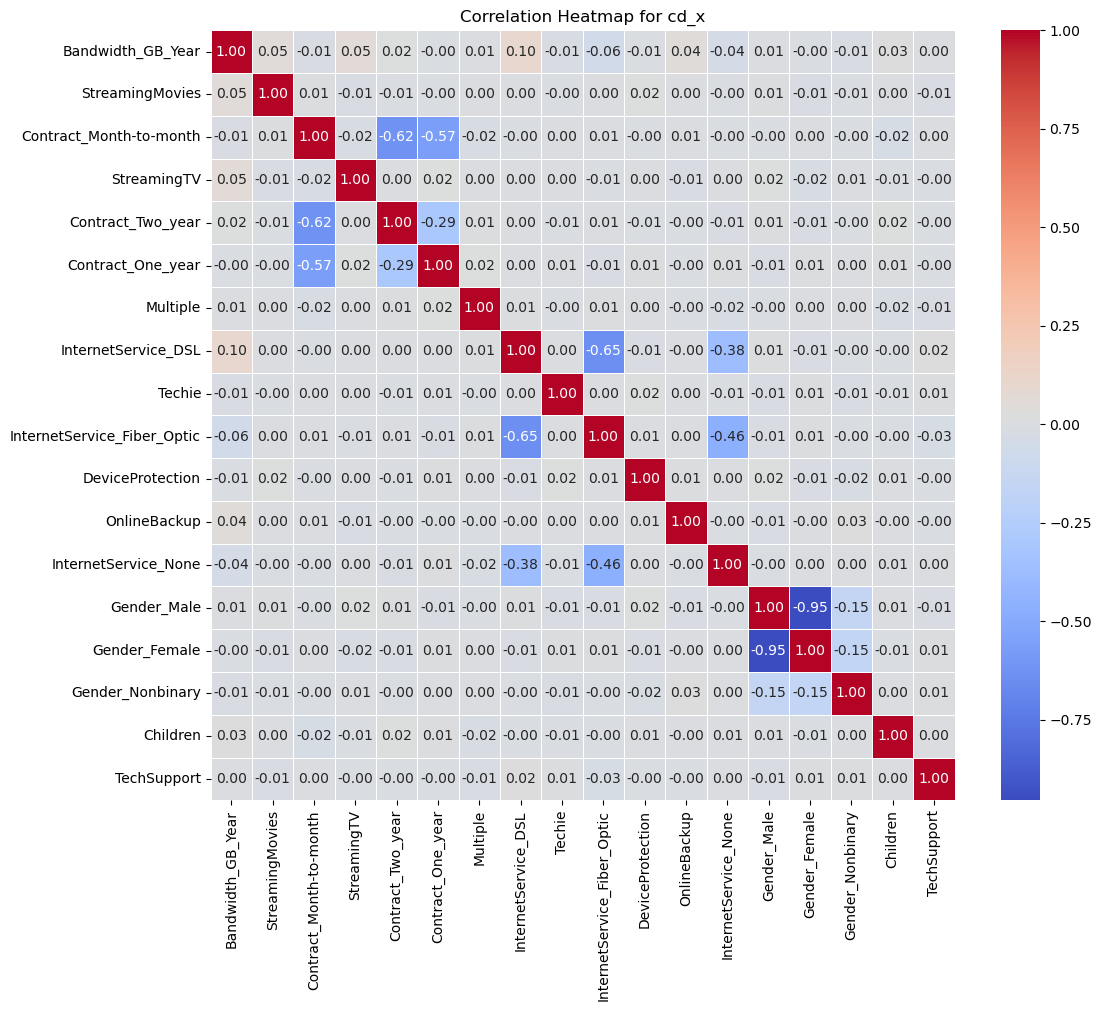

In [323]:
subset_columns = ["Bandwidth_GB_Year", "StreamingMovies", "Contract_Month-to-month", 
                  "StreamingTV", "Contract_Two_year", "Contract_One_year", "Multiple", 
                  "InternetService_DSL", "Techie", "InternetService_Fiber_Optic", 
                  "DeviceProtection", "OnlineBackup", "InternetService_None", 
                  "Gender_Male", "Gender_Female","Gender_Nonbinary","Children","TechSupport"]

# Create a subset DataFrame
subset_df = cd_x[subset_columns]

# Calculate correlation matrix
correlation_matrix = subset_df.corr()

# Create heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap for cd_x")
plt.show()

In [324]:
cd_x = cd_x.drop(["Gender_Female"], axis=1).copy()
cd_x = cd_x.drop(["Gender_Male"], axis=1).copy()
cd_x = cd_x.drop(["Contract_Month-to-month"], axis=1).copy()
cd_x = cd_x.drop(["Contract_Two_year"], axis=1).copy()
cd_x = cd_x.drop(["Contract_One_year"], axis=1).copy()
cd_x = cd_x.drop(["InternetService_DSL"], axis=1).copy()
cd_x = cd_x.drop(["InternetService_Fiber_Optic"], axis=1).copy()

In [325]:
#Run SelectKBest to determine the best features
feat_select = SelectKBest(f_classif, k='all')
feat_select.fit_transform(cd_x,cd_Y)
feat_pvals = pd.DataFrame({'Feature' : cd_x.columns, 'p_value' : feat_select.pvalues_}).sort_values('p_value') 
feat_pvals[feat_pvals['p_value'] < 0.05]

,Feature,p_value
10,Bandwidth_GB_Year,0.000000e+00
9,StreamingMovies,5.393071e-192
8,StreamingTV,2.414257e-120
4,Multiple,5.642495e-40
3,Techie,2.408802e-11
6,DeviceProtection,1.578944e-08
5,OnlineBackup,4.339213e-07
1,InternetService_None,1.599912e-04


In [326]:
cd_x = cd_x.drop(["Children"], axis=1).copy()
cd_x = cd_x.drop(["Gender_Nonbinary"], axis=1).copy()
cd_x = cd_x.drop(["TechSupport"], axis=1).copy()

In [327]:
#Standardize the explanatory variables (x) to put all on the same scale for KNN to measure distance
cd_x = pd.DataFrame(preprocessing.MinMaxScaler().fit_transform(cd_x), columns=cd_x.columns)

In [328]:
cd_x

,InternetService_None,Techie,Multiple,OnlineBackup,DeviceProtection,StreamingTV,StreamingMovies,Bandwidth_GB_Year
0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.106951
1,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.092165
2,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.271180
3,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.286868
4,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.016561
...,...,...,...,...,...,...,...,...
9995,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.907513
9996,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.791099
9997,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.571688
9998,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.901403


In [329]:
cd_Y

CaseOrder
1        0
2        1
3        0
4        0
5        1
        ..
9996     0
9997     0
9998     0
9999     0
10000    0
Name: Churn, Length: 10000, dtype: int64

In [330]:
clean_cd = cd_x.copy()
clean_cd.insert(1, column="Churn", value= cd_Y.reset_index().drop('CaseOrder', axis=1))

In [331]:
clean_cd

,InternetService_None,Churn,Techie,Multiple,OnlineBackup,DeviceProtection,StreamingTV,StreamingMovies,Bandwidth_GB_Year
0,0.0,0,0.0,0.0,1.0,0.0,0.0,1.0,0.106951
1,0.0,1,1.0,1.0,0.0,0.0,1.0,1.0,0.092165
2,0.0,0,1.0,1.0,0.0,0.0,0.0,1.0,0.271180
3,0.0,0,1.0,0.0,0.0,0.0,1.0,0.0,0.286868
4,0.0,1,0.0,0.0,0.0,0.0,1.0,0.0,0.016561
...,...,...,...,...,...,...,...,...,...
9995,0.0,0,0.0,1.0,1.0,1.0,0.0,0.0,0.907513
9996,0.0,0,0.0,1.0,1.0,1.0,1.0,0.0,0.791099
9997,0.0,0,0.0,1.0,1.0,0.0,0.0,0.0,0.571688
9998,0.0,0,0.0,1.0,0.0,0.0,1.0,1.0,0.901403


In [332]:
clean_cd.to_csv("C:/Users/cklni/Desktop/WGU/D209/d209clean1.csv", index=False)

In [333]:
#Assigning the features to X and the response to y
X= cd_x
y= cd_Y

#Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, test_size=0.2, random_state=15, stratify=y)

In [334]:
#Saving the training and testing data sets
X_train.to_csv("C:/Users/cklni/Desktop/WGU/D209/Xtrain.csv", index=False)
X_test.to_csv("C:/Users/cklni/Desktop/WGU/D209/Xtest.csv", index=False)
y_train.to_csv("C:/Users/cklni/Desktop/WGU/D209/ytrain.csv", index=False)
y_test.to_csv("C:/Users/cklni/Desktop/WGU/D209/ytest.csv", index=False)

In [335]:
#Determine what is the best number to use for k
param_grid = {'n_neighbors' : np.arange(1, 30)}
#Instantiate the KNeighborsClassifier object
knn = KNeighborsClassifier()
#Using GridSearchCV to perform 5 fold cross validation
knn_cv = GridSearchCV(knn, param_grid, cv=5)
#Fitting to the training data
knn_cv.fit(X_train, y_train)
#Finding best parameter
knn_cv.best_params_

{'n_neighbors': 15}

In [336]:
#Finding score of best parameter
knn_cv.best_score_

0.83675

In [337]:
#Perform KNN using k=15 
knn = KNeighborsClassifier(n_neighbors = 15)
#Fitting to the training data
knn.fit(X_train, y_train)
#Generate y_pred array for model's confusion matrix
y_pred = knn.predict(X_test)
final_matrix = confusion_matrix(y_test, y_pred)

In [338]:
#Confusion matrix
print(final_matrix)

[[1344  126]
 [ 216  314]]


In [339]:
print(f"The training accuracy is {knn.score(X_train, y_train)}.")
print(f"The testing accuracy is {knn.score(X_test, y_test)}.")

The training accuracy is 0.85725.
The testing accuracy is 0.829.


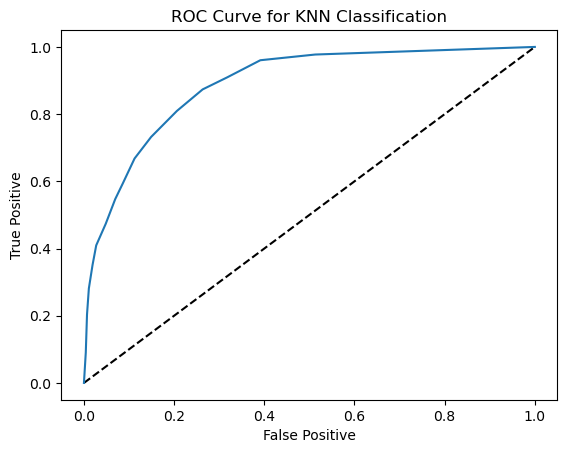

The Area Under the Curve (AUC) score is: 0.8879412142215377

              precision    recall  f1-score   support

           0       0.86      0.91      0.89      1470
           1       0.71      0.59      0.65       530

    accuracy                           0.83      2000
   macro avg       0.79      0.75      0.77      2000
weighted avg       0.82      0.83      0.82      2000



In [340]:
# Generate AUC score and print
y_pred_prob = knn.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive')
plt.ylabel('True Positive')
plt.title('ROC Curve for KNN Classification')
plt.show()
print(f"The Area Under the Curve (AUC) score is: {roc_auc_score(y_test, y_pred_prob)}\n")
print(classification_report(y_test, y_pred))